# Módulo de estatística 

## Projeto A - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 22/11 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes
- Serão 2 projetos A e B porém apenas 1 projeto deverá ser entregue e escolhido pelo grupo

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

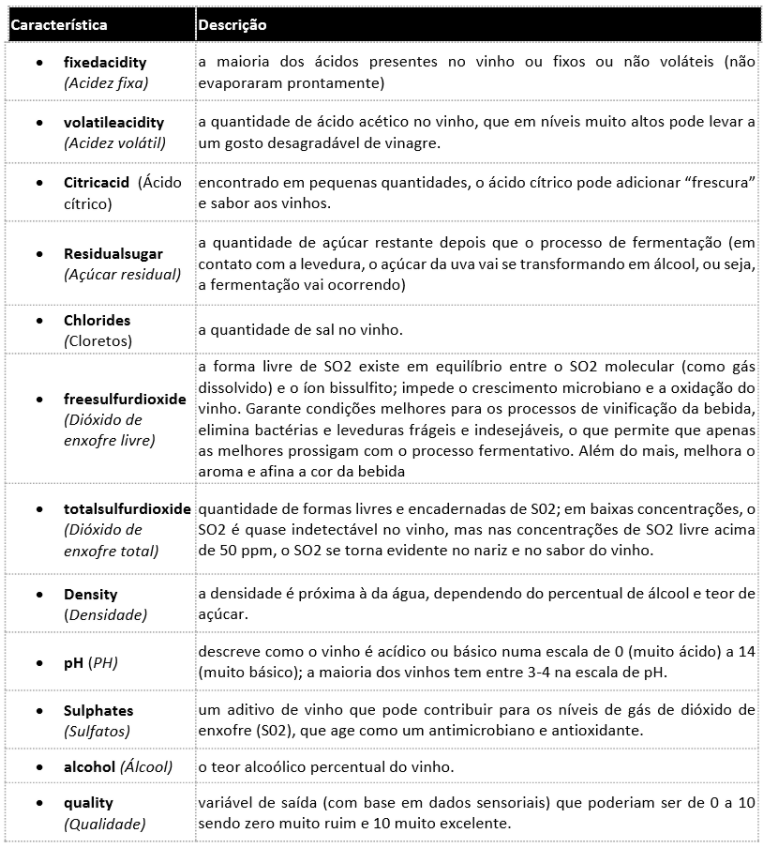

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

sns.set()

## Etapa 1

In [2]:
#Lendo o csv winequality-red.csv e gerando o DataFrame

df_wine_red = pd.read_csv('winequality-red.csv', delimiter=';')

df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Adicionando uma coluna com o tipo de vinho 'red'

df_wine_red['type'] = 'red'

df_wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
#Lendo o csv winequality-white.csv e gerando o DataFrame

df_wine_white = pd.read_csv('winequality-white.csv', delimiter=';')

df_wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Adicionando uma coluna com o tipo de vinho 'white'

df_wine_white['type'] = 'white'

df_wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
df_wine = df_wine_red.append(df_wine_white, ignore_index=True)

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

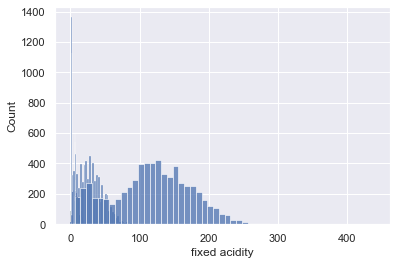

In [9]:
sns.histplot(df_wine['fixed acidity'])
sns.histplot(df_wine['volatile acidity'])
sns.histplot(df_wine['citric acid'])
sns.histplot(df_wine['residual sugar'])
sns.histplot(df_wine['chlorides'])
sns.histplot(df_wine['free sulfur dioxide'])
sns.histplot(df_wine['total sulfur dioxide'])
sns.histplot(df_wine['density'])
sns.histplot(df_wine['pH'])
sns.histplot(df_wine['sulphates'])
sns.histplot(df_wine['alcohol'])

In [ ]:
# 1 Análise da Acidez Fixa


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Acidez Fixa')

ax = axes[0]
ax.hist(df_wine['fixed acidity'])
ax.axvline(df_wine['fixed acidity'].mean(), color='red', label='média')
#plt.axvline(df_wine_red['fixed acidity'].median(), color="green", label="mediana")
ax.axvline(df_wine['fixed acidity'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['fixed acidity'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['fixed acidity'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['fixed acidity'], meanline=False)
ax.axhline(np.quantile(df_wine['fixed acidity'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['fixed acidity'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['fixed acidity']), color="red", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['fixed acidity']), color="green", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'fixed acidity', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'fixed acidity');

In [11]:
df_wine['fixed acidity'].quantile(0.25)
df_wine['fixed acidity'].quantile(0.75)

dq1 = df_wine['fixed acidity'].quantile(0.75) - df_wine['fixed acidity'].quantile(0.25)

wine_fa = df_wine['fixed acidity'][(df_wine['fixed acidity'] < df_wine['fixed acidity'].quantile(0.75) + dq1) & 
                      (df_wine['fixed acidity'] > df_wine['fixed acidity'].quantile(0.25) - dq1)]

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Acidez Fixa s/ Outliers')

ax = axes[0]
ax.hist(wine_fa)
ax.axvline(wine_fa.mean(), color='red', label='média')
ax.axvline(wine_fa.quantile(0.25), color="orange", label="q1")
ax.axvline(wine_fa.quantile(0.5), color="green", label="q2=mediana")
ax.axvline(wine_fa.quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(wine_fa, meanline=False)
ax.axhline(np.quantile(wine_fa, 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(wine_fa, 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(wine_fa), color="red", label="Média", alpha=0.4)
ax.axhline(np.median(wine_fa), color="green", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [12]:
# Identificando os índices dos outliers 'fixed acidity'
fa_out = df_wine.index[(df_wine['fixed acidity'] > df_wine['fixed acidity'].quantile(0.75) + dq1)|
         (df_wine['fixed acidity'] < df_wine['fixed acidity'].quantile(0.25) - dq1)].tolist()

fa_out

[3,
 45,
 56,
 68,
 74,
 88,
 94,
 95,
 113,
 115,
 151,
 197,
 200,
 205,
 206,
 209,
 210,
 212,
 241,
 243,
 244,
 250,
 252,
 256,
 259,
 264,
 265,
 269,
 271,
 272,
 277,
 278,
 280,
 284,
 285,
 286,
 289,
 291,
 292,
 294,
 295,
 296,
 301,
 305,
 307,
 308,
 310,
 316,
 317,
 318,
 319,
 320,
 321,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 335,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 347,
 348,
 349,
 350,
 351,
 353,
 356,
 357,
 358,
 359,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 372,
 374,
 375,
 376,
 377,
 378,
 381,
 389,
 391,
 392,
 394,
 395,
 397,
 398,
 402,
 403,
 406,
 407,
 408,
 409,
 411,
 413,
 416,
 418,
 420,
 423,
 427,
 428,
 429,
 430,
 432,
 433,
 434,
 435,
 437,
 438,
 440,
 441,
 442,
 443,
 445,
 446,
 447,
 449,
 450,
 453,
 455,
 457,
 458,
 459,
 460,
 462,
 464,
 465,
 466,
 468,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 495,
 498,
 

In [13]:
# Quantidade de outliers 'fixed acidity'

len(fa_out)

603

In [14]:
# Percentual de outliers 'fixed acidity'

len(fa_out)/len(df_wine)

0.09281206710789595

In [125]:
# Criando o DataFrame sem outliers

df_wine_sout = df_wine

In [63]:
df_wine_teste = df_wine

In [64]:
# Eliminado os outliers 'fixed acidity' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[fa_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [65]:
len(df_wine_teste)

5894

In [158]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [159]:
lr.fit(X_sout, y_sout)

LinearRegression()

In [160]:
lr.score(X_sout, y_sout)

0.29000061255306486

In [161]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:25:37   Log-Likelihood:                -6696.8
No. Observations:                6010   AIC:                         1.342e+04
Df Residuals:                    5998   BIC:                         1.350e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   73.6971     14.070      5.238      0.000      46.115     101.279
fixed acidity            0.0890      0.017      5.332      0.000       0.056       0.122
volatile acidity        -1.3519      0.083    -16.222      0.000      -1.515      -1.189
citric acid             -0.1503      0.087     -1.737      0.082      -0.320       0.019
residual sugar           0.0528      0.006      8.932      0.000       0.041       0.064
chlorides                0.9778      0.969      1.009      0.313      -0.922       2.878
free sulfur dioxide      0.0058      0.001      7.417      0.000       0.004       0.007
total sulfur dioxide    -0.0023      0.000     -8.043      0.000      -0.003      -0.002
density                -73.5956     14.345     -5.130      0.000    -101.718     -45.473
pH                       0.5280      0.095      5.580      0.000       0.343       0.714
sulphates                0.9114      0.086     10.643      0.000       0.744       1.079
alcohol                  0.2636      0.018     14.601      0.000       0.228       0.299
==============================================================================
Omnibus:                      132.893   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.435
Skew:                           0.011   Prob(JB):                     1.57e-65
Kurtosis:                       4.091   Cond. No.                     2.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'fixed acidity' verificamos que a explicabilidade do modelo diminuiu.

In [28]:
# 2 Análise da Acidez Volátil


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Acidez Volátil')

ax = axes[0]
ax.hist(df_wine['volatile acidity'])
ax.axvline(df_wine['volatile acidity'].mean(), color='red', label='média')
ax.axvline(df_wine['volatile acidity'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['volatile acidity'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['volatile acidity'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['volatile acidity'], meanline=False)
ax.axhline(np.quantile(df_wine['volatile acidity'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['volatile acidity'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['volatile acidity']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['volatile acidity']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     265.6
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:54:01   Log-Likelihood:                -6520.7
No. Observations:                5894   AIC:                         1.306e+04
Df Residuals:                    5884   BIC:                         1.313e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.2379     12.789      5.414      0.000      44.167      94.308
fixed acidity            0.0757      0.019      4.034      0.000       0.039       0.112
volatile acidity        -1.2989      0.076    -17.058      0.000      -1.448      -1.150
residual sugar           0.0477      0.005      8.824      0.000       0.037       0.058
free sulfur dioxide      0.0059      0.001      7.709      0.000       0.004       0.007
total sulfur dioxide    -0.0024      0.000     -8.418      0.000      -0.003      -0.002
density                -68.8439     13.031     -5.283      0.000     -94.389     -43.299
pH                       0.5606      0.094      5.979      0.000       0.377       0.744
sulphates                0.6941      0.081      8.605      0.000       0.536       0.852
alcohol                  0.2493      0.018     13.567      0.000       0.213       0.285
==============================================================================
Omnibus:                      122.530   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.845
Skew:                           0.041   Prob(JB):                     5.09e-58
Kurtosis:                       4.033   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sns.histplot(data = df_wine, x = 'volatile acidity', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'volatile acidity');

In [30]:
df_wine['volatile acidity'].quantile(0.25)
df_wine['volatile acidity'].quantile(0.75)

dq2 = df_wine['volatile acidity'].quantile(0.75) - df_wine['volatile acidity'].quantile(0.25)

wine_va = df_wine['volatile acidity'][(df_wine['volatile acidity'] < df_wine['volatile acidity'].quantile(0.75) + dq2) & 
                      (df_wine['volatile acidity'] > df_wine['volatile acidity'].quantile(0.25) - dq2)]


In [74]:
# Identificando os índices dos outliers 'volatile acidity'
va_out = df_wine.index[(df_wine['volatile acidity'] > df_wine['volatile acidity'].quantile(0.75) + dq2)|
         (df_wine['volatile acidity'] < df_wine['volatile acidity'].quantile(0.25) - dq2)].tolist()

va_out

[0,
 1,
 2,
 4,
 5,
 6,
 7,
 8,
 10,
 12,
 13,
 14,
 15,
 18,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 38,
 41,
 43,
 44,
 46,
 50,
 55,
 57,
 58,
 61,
 63,
 64,
 65,
 67,
 69,
 70,
 71,
 72,
 73,
 77,
 78,
 79,
 83,
 89,
 94,
 95,
 96,
 98,
 100,
 103,
 105,
 107,
 109,
 111,
 112,
 119,
 120,
 122,
 123,
 125,
 126,
 127,
 128,
 130,
 134,
 135,
 136,
 140,
 141,
 145,
 146,
 152,
 153,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 173,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 187,
 192,
 195,
 196,
 198,
 199,
 211,
 214,
 216,
 217,
 222,
 223,
 224,
 226,
 227,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 242,
 245,
 246,
 247,
 249,
 251,
 253,
 254,
 257,
 261,
 266,
 273,
 274,
 284,
 285,
 296,
 297,
 298,
 299,
 302,
 303,
 304,
 306,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 332,
 334,
 335,
 345,
 346,
 349,
 350,
 351,
 352,
 355,
 360,
 362,
 364,
 366,
 367,
 370,
 378,
 385,
 387,
 390,
 393,
 394,
 396,
 397,
 398,
 399,
 400,
 403,
 404,
 412,
 4

In [164]:
df_wine_teste = df_wine

In [165]:
# Eliminado os outliers 'volatile acidity' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[va_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,red


In [166]:
len(df_wine_teste)

5774

In [167]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [168]:
lr.score(X_sout, y_sout)

0.26484813149957354

In [169]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:26:01   Log-Likelihood:                -6451.2
No. Observations:                5774   AIC:                         1.293e+04
Df Residuals:                    5762   BIC:                         1.301e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   67.9116     14.134      4.805      0.000      40.204      95.619
fixed acidity            0.0721      0.017      4.128      0.000       0.038       0.106
volatile acidity        -1.4256      0.114    -12.501      0.000      -1.649      -1.202
citric acid             -0.0764      0.087     -0.881      0.379      -0.247       0.094
residual sugar           0.0487      0.006      8.437      0.000       0.037       0.060
chlorides               -0.4222      0.380     -1.110      0.267      -1.168       0.323
free sulfur dioxide      0.0059      0.001      7.495      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -8.580      0.000      -0.003      -0.002
density                -67.3557     14.402     -4.677      0.000     -95.590     -39.121
pH                       0.5035      0.098      5.149      0.000       0.312       0.695
sulphates                0.7780      0.083      9.350      0.000       0.615       0.941
alcohol                  0.2593      0.020     13.169      0.000       0.221       0.298
==============================================================================
Omnibus:                      133.912   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.333
Skew:                           0.013   Prob(JB):                     1.83e-67
Kurtosis:                       4.130   Cond. No.                     2.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'volatile acidity' verificamos que a explicabilidade do modelo diminuiu.

In [ ]:
# 3 Análise do Ácido Cítrico


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Ácido Cítrico')

ax = axes[0]
ax.hist(df_wine['citric acid'])
ax.axvline(df_wine['citric acid'].mean(), color='red', label='média')
ax.axvline(df_wine['citric acid'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['citric acid'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['citric acid'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['citric acid'], meanline=False)
ax.axhline(np.quantile(df_wine['citric acid'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['citric acid'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['citric acid']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['citric acid']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'citric acid', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'citric acid');

In [84]:
df_wine['citric acid'].quantile(0.25)
df_wine['citric acid'].quantile(0.75)

dq3 = df_wine['citric acid'].quantile(0.75) - df_wine['volatile acidity'].quantile(0.25)

In [85]:
# Identificando os índices dos outliers 'citric acid'
ca_out = df_wine.index[(df_wine['citric acid'] > df_wine['citric acid'].quantile(0.75) + dq3)|
         (df_wine['citric acid'] < df_wine['citric acid'].quantile(0.25) - dq3)].tolist()

ca_out

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 12,
 16,
 18,
 28,
 29,
 30,
 31,
 35,
 44,
 51,
 52,
 55,
 56,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 75,
 76,
 77,
 81,
 89,
 94,
 96,
 98,
 106,
 118,
 119,
 121,
 122,
 123,
 125,
 126,
 127,
 130,
 133,
 134,
 142,
 143,
 144,
 146,
 151,
 152,
 153,
 158,
 160,
 161,
 162,
 167,
 168,
 170,
 173,
 175,
 178,
 182,
 185,
 197,
 198,
 199,
 205,
 206,
 209,
 210,
 212,
 214,
 222,
 230,
 231,
 235,
 236,
 237,
 238,
 241,
 245,
 246,
 248,
 249,
 251,
 254,
 257,
 258,
 261,
 262,
 266,
 268,
 270,
 272,
 275,
 276,
 281,
 284,
 285,
 297,
 298,
 299,
 300,
 304,
 322,
 326,
 328,
 330,
 331,
 333,
 334,
 338,
 345,
 346,
 347,
 349,
 351,
 352,
 353,
 355,
 357,
 358,
 359,
 362,
 363,
 364,
 366,
 367,
 370,
 374,
 375,
 378,
 381,
 385,
 390,
 391,
 393,
 394,
 395,
 396,
 397,
 398,
 400,
 404,
 407,
 408,
 416,
 419,
 421,
 425,
 426,
 429,
 432,
 433,
 435,
 437,
 440,
 441,
 442,
 444,
 446,
 449,
 450,
 452,
 453,
 455,
 458,
 459,
 46

In [86]:
# Quantidade de outliers 'citric acid'

len(ca_out)

787

In [87]:
# Percentual de outliers 'citric acid'

len(ca_out)/len(df_wine)

0.121132830537171

In [170]:
df_wine_teste = df_wine

In [171]:
# Eliminado os outliers 'citric acid' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[ca_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,red
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,red
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,red


In [172]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type', 'citric acid', 'chlorides'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [173]:
lr.score(X_sout, y_sout)

0.27877857803421513

In [174]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:26:17   Log-Likelihood:                -6385.5
No. Observations:                5710   AIC:                         1.279e+04
Df Residuals:                    5700   BIC:                         1.286e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   75.3114     13.549      5.558      0.000      48.750     101.872
fixed acidity            0.0786      0.017      4.603      0.000       0.045       0.112
volatile acidity        -1.2194      0.084    -14.538      0.000      -1.384      -1.055
residual sugar           0.0526      0.006      9.433      0.000       0.042       0.064
free sulfur dioxide      0.0058      0.001      7.262      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -8.547      0.000      -0.003      -0.002
density                -75.0091     13.797     -5.437      0.000    -102.057     -47.962
pH                       0.5640      0.097      5.820      0.000       0.374       0.754
sulphates                0.7488      0.082      9.144      0.000       0.588       0.909
alcohol                  0.2464      0.020     12.588      0.000       0.208       0.285
==============================================================================
Omnibus:                      134.934   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.831
Skew:                           0.005   Prob(JB):                     1.17e-68
Kurtosis:                       4.147   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'citric acid' verificamos que a explicabilidade do modelo diminuiu.

In [ ]:
# 4 Análise do Açúcar Residual


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Açúcar Residual')

ax = axes[0]
ax.hist(df_wine['residual sugar'])
ax.axvline(df_wine['residual sugar'].mean(), color='red', label='média')
ax.axvline(df_wine['residual sugar'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['residual sugar'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['residual sugar'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['residual sugar'], meanline=False)
ax.axhline(np.quantile(df_wine['residual sugar'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['residual sugar'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['residual sugar']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['residual sugar']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'residual sugar', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'residual sugar');

In [99]:
df_wine['residual sugar'].quantile(0.25)
df_wine['residual sugar'].quantile(0.75)

dq4 = df_wine['residual sugar'].quantile(0.75) - df_wine['residual sugar'].quantile(0.25)

In [100]:
# Identificando os índices dos outliers 'residual sugar'
rs_out = df_wine.index[(df_wine['residual sugar'] > df_wine['residual sugar'].quantile(0.75) + dq4)|
         (df_wine['residual sugar'] < df_wine['residual sugar'].quantile(0.25) - dq4)].tolist()

rs_out

[480,
 1434,
 1435,
 1599,
 1606,
 1613,
 1633,
 1637,
 1638,
 1680,
 1695,
 1698,
 1702,
 1704,
 1706,
 1707,
 1710,
 1732,
 1734,
 1760,
 1773,
 1781,
 1790,
 1799,
 1817,
 1824,
 1828,
 1838,
 1850,
 1860,
 1864,
 1882,
 1883,
 1885,
 1891,
 1925,
 1927,
 1946,
 1959,
 1988,
 1989,
 1997,
 2002,
 2009,
 2013,
 2043,
 2060,
 2068,
 2099,
 2134,
 2135,
 2171,
 2189,
 2207,
 2219,
 2229,
 2230,
 2248,
 2249,
 2250,
 2251,
 2271,
 2293,
 2294,
 2296,
 2297,
 2316,
 2332,
 2335,
 2356,
 2361,
 2362,
 2372,
 2377,
 2381,
 2412,
 2413,
 2445,
 2467,
 2528,
 2536,
 2538,
 2545,
 2558,
 2559,
 2561,
 2566,
 2571,
 2591,
 2597,
 2642,
 2664,
 2670,
 2677,
 2682,
 2687,
 2689,
 2690,
 2755,
 2756,
 2758,
 2760,
 2791,
 2792,
 2796,
 2797,
 2805,
 2844,
 2866,
 2869,
 2875,
 2903,
 2931,
 2955,
 2967,
 3016,
 3035,
 3053,
 3086,
 3088,
 3107,
 3123,
 3128,
 3133,
 3139,
 3165,
 3179,
 3207,
 3233,
 3241,
 3243,
 3252,
 3262,
 3263,
 3279,
 3281,
 3282,
 3283,
 3284,
 3286,
 3290,
 3295,
 3306,


In [101]:
# Quantidade de outliers 'residual sugar'

len(rs_out)

434

In [102]:
# Percentual de outliers 'residual sugar'

len(rs_out)/len(df_wine)

0.06680006156687703

In [182]:
df_wine_teste = df_wine

In [183]:
# Eliminado os outliers 'residual sugar' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[rs_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [184]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [185]:
lr.score(X_sout, y_sout)

0.3084684689078516

In [179]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     245.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:26:41   Log-Likelihood:                -6707.1
No. Observations:                6063   AIC:                         1.344e+04
Df Residuals:                    6051   BIC:                         1.352e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   71.3609     12.972      5.501      0.000      45.931      96.791
fixed acidity            0.0864      0.017      5.192      0.000       0.054       0.119
volatile acidity        -1.2684      0.079    -15.990      0.000      -1.424      -1.113
citric acid             -0.0942      0.083     -1.134      0.257      -0.257       0.069
residual sugar           0.0569      0.006      9.873      0.000       0.046       0.068
chlorides               -0.3246      0.336     -0.965      0.335      -0.984       0.335
free sulfur dioxide      0.0063      0.001      8.115      0.000       0.005       0.008
total sulfur dioxide    -0.0026      0.000     -8.980      0.000      -0.003      -0.002
density                -71.2560     13.236     -5.383      0.000     -97.204     -45.309
pH                       0.5831      0.096      6.086      0.000       0.395       0.771
sulphates                0.8283      0.078     10.565      0.000       0.675       0.982
alcohol                  0.2556      0.018     14.079      0.000       0.220       0.291
==============================================================================
Omnibus:                      144.205   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.933
Skew:                          -0.028   Prob(JB):                     3.07e-73
Kurtosis:                       4.148   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'residual sugar' verificamos que a explicabilidade do modelo aumentou. Portanto, acrescentaremos no DataFrame 'df_wine_sout'.

In [180]:
# Eliminado os outliers 'residual sugar' encontrados.

df_wine_sout = df_wine_sout[~df_wine_sout.index.isin(rs_out)]
df_wine_sout.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [181]:
len(df_wine_sout)

6063

In [ ]:
# 5 Análise dos Cloretos


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Cloretos')

ax = axes[0]
ax.hist(df_wine['chlorides'])
ax.axvline(df_wine['chlorides'].mean(), color='red', label='média')
ax.axvline(df_wine['chlorides'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['chlorides'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['chlorides'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['chlorides'], meanline=False)
ax.axhline(np.quantile(df_wine['chlorides'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['chlorides'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['chlorides']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['chlorides']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'chlorides', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'chlorides');

In [112]:
df_wine['chlorides'].quantile(0.25)
df_wine['chlorides'].quantile(0.75)

dq5 = df_wine['chlorides'].quantile(0.75) - df_wine['chlorides'].quantile(0.25)

In [113]:
# Identificando os índices dos outliers 'chlorides'
c_out = df_wine.index[(df_wine['chlorides'] > df_wine['chlorides'].quantile(0.75) + dq5)|
         (df_wine['chlorides'] < df_wine['chlorides'].quantile(0.25) - dq5)].tolist()

c_out

[1,
 10,
 13,
 14,
 15,
 17,
 19,
 22,
 27,
 31,
 34,
 38,
 42,
 46,
 47,
 54,
 57,
 61,
 74,
 75,
 76,
 77,
 81,
 83,
 86,
 88,
 91,
 92,
 96,
 106,
 109,
 110,
 114,
 118,
 119,
 120,
 121,
 125,
 130,
 145,
 147,
 151,
 152,
 153,
 165,
 169,
 181,
 185,
 192,
 201,
 205,
 206,
 208,
 216,
 221,
 226,
 235,
 236,
 237,
 238,
 240,
 241,
 242,
 258,
 266,
 269,
 271,
 277,
 281,
 284,
 285,
 289,
 291,
 293,
 294,
 298,
 303,
 304,
 307,
 308,
 312,
 315,
 316,
 326,
 327,
 330,
 331,
 333,
 335,
 338,
 342,
 343,
 347,
 349,
 350,
 351,
 353,
 357,
 358,
 360,
 365,
 368,
 373,
 375,
 379,
 389,
 393,
 396,
 400,
 407,
 408,
 412,
 413,
 415,
 416,
 418,
 442,
 447,
 448,
 449,
 450,
 451,
 456,
 457,
 463,
 465,
 470,
 482,
 483,
 484,
 512,
 513,
 514,
 515,
 516,
 517,
 522,
 525,
 527,
 531,
 532,
 534,
 539,
 540,
 545,
 549,
 554,
 555,
 556,
 557,
 558,
 562,
 566,
 567,
 568,
 569,
 571,
 576,
 584,
 586,
 587,
 593,
 594,
 604,
 608,
 614,
 618,
 624,
 625,
 626,
 627,
 628

In [114]:
# Quantidade de outliers 'chlorides'

len(c_out)

487

In [115]:
# Percentual de outliers 'chlorides'

len(c_out)/len(df_wine)

0.07495767277204864

In [186]:
df_wine_teste = df_wine

In [187]:
# Eliminado os outliers 'chlorides' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[c_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [188]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [189]:
lr.score(X_sout, y_sout)

0.29000061255306486

In [190]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:30:11   Log-Likelihood:                -6696.8
No. Observations:                6010   AIC:                         1.342e+04
Df Residuals:                    5998   BIC:                         1.350e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   73.6971     14.070      5.238      0.000      46.115     101.279
fixed acidity            0.0890      0.017      5.332      0.000       0.056       0.122
volatile acidity        -1.3519      0.083    -16.222      0.000      -1.515      -1.189
citric acid             -0.1503      0.087     -1.737      0.082      -0.320       0.019
residual sugar           0.0528      0.006      8.932      0.000       0.041       0.064
chlorides                0.9778      0.969      1.009      0.313      -0.922       2.878
free sulfur dioxide      0.0058      0.001      7.417      0.000       0.004       0.007
total sulfur dioxide    -0.0023      0.000     -8.043      0.000      -0.003      -0.002
density                -73.5956     14.345     -5.130      0.000    -101.718     -45.473
pH                       0.5280      0.095      5.580      0.000       0.343       0.714
sulphates                0.9114      0.086     10.643      0.000       0.744       1.079
alcohol                  0.2636      0.018     14.601      0.000       0.228       0.299
==============================================================================
Omnibus:                      132.893   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.435
Skew:                           0.011   Prob(JB):                     1.57e-65
Kurtosis:                       4.091   Cond. No.                     2.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'chlorides' verificamos que a explicabilidade do modelo diminui.

In [ ]:
# 6 Análise do Dióxido de Enxofre Livre


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Dióxido de Enxofre Livre')

ax = axes[0]
ax.hist(df_wine['free sulfur dioxide'])
ax.axvline(df_wine['free sulfur dioxide'].mean(), color='red', label='média')
ax.axvline(df_wine['free sulfur dioxide'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['free sulfur dioxide'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['free sulfur dioxide'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['free sulfur dioxide'], meanline=False)
ax.axhline(np.quantile(df_wine['free sulfur dioxide'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['free sulfur dioxide'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['free sulfur dioxide']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['free sulfur dioxide']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'free sulfur dioxide', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'free sulfur dioxide');

In [126]:
df_wine['free sulfur dioxide'].quantile(0.25)
df_wine['free sulfur dioxide'].quantile(0.75)

dq6 = df_wine['free sulfur dioxide'].quantile(0.75) - df_wine['free sulfur dioxide'].quantile(0.25)

In [127]:
# Identificando os índices dos outliers 'free sulfur dioxide'
fsd_out = df_wine.index[(df_wine['free sulfur dioxide'] > df_wine['free sulfur dioxide'].quantile(0.75) + dq6)|
         (df_wine['free sulfur dioxide'] < df_wine['free sulfur dioxide'].quantile(0.25) - dq6)].tolist()

fsd_out

[396,
 400,
 1244,
 1558,
 1666,
 1686,
 1711,
 1717,
 1764,
 1784,
 1793,
 1794,
 1795,
 1826,
 1862,
 1896,
 1924,
 1946,
 1986,
 1994,
 2004,
 2031,
 2037,
 2058,
 2063,
 2067,
 2078,
 2083,
 2095,
 2098,
 2140,
 2148,
 2169,
 2179,
 2241,
 2253,
 2258,
 2330,
 2350,
 2351,
 2356,
 2365,
 2522,
 2531,
 2591,
 2725,
 2735,
 2736,
 2744,
 2749,
 2750,
 2757,
 2762,
 2856,
 2862,
 2931,
 2988,
 3037,
 3038,
 3087,
 3273,
 3287,
 3326,
 3330,
 3358,
 3359,
 3381,
 3384,
 3441,
 3454,
 3458,
 3460,
 3494,
 3503,
 3530,
 3554,
 3574,
 3697,
 3707,
 3798,
 3881,
 3882,
 3883,
 3884,
 3887,
 3896,
 3933,
 3935,
 3967,
 4001,
 4018,
 4026,
 4028,
 4110,
 4118,
 4153,
 4156,
 4173,
 4174,
 4175,
 4224,
 4228,
 4253,
 4254,
 4303,
 4308,
 4309,
 4315,
 4327,
 4334,
 4347,
 4349,
 4417,
 4459,
 4471,
 4473,
 4476,
 4491,
 4492,
 4496,
 4524,
 4529,
 4531,
 4536,
 4574,
 4588,
 4605,
 4624,
 4649,
 4651,
 4663,
 4665,
 4671,
 4812,
 4906,
 4910,
 4913,
 4978,
 4986,
 5058,
 5060,
 5068,
 5069,
 

In [128]:
# Quantidade de outliers 'free sulfur dioxide'

len(fsd_out)

203

In [129]:
# Percentual de outliers 'free sulfur dioxide'

len(fsd_out)/len(df_wine)

0.0312451900877328

In [191]:
df_wine_teste = df_wine

In [192]:
# Eliminado os outliers 'free sulfur dioxide' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[fsd_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [193]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [194]:
lr.score(X_sout, y_sout)

0.29670635795173605

In [195]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     240.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:30:55   Log-Likelihood:                -6962.2
No. Observations:                6294   AIC:                         1.395e+04
Df Residuals:                    6282   BIC:                         1.403e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   51.7188     11.977      4.318      0.000      28.239      75.199
fixed acidity            0.0720      0.016      4.582      0.000       0.041       0.103
volatile acidity        -1.2879      0.078    -16.517      0.000      -1.441      -1.135
citric acid             -0.1538      0.081     -1.896      0.058      -0.313       0.005
residual sugar           0.0407      0.005      7.799      0.000       0.030       0.051
chlorides               -0.6013      0.340     -1.768      0.077      -1.268       0.066
free sulfur dioxide      0.0097      0.001     10.914      0.000       0.008       0.011
total sulfur dioxide    -0.0028      0.000     -9.766      0.000      -0.003      -0.002
density                -50.9581     12.225     -4.168      0.000     -74.923     -26.994
pH                       0.4234      0.092      4.626      0.000       0.244       0.603
sulphates                0.7740      0.078      9.979      0.000       0.622       0.926
alcohol                  0.2695      0.017     16.039      0.000       0.237       0.302
==============================================================================
Omnibus:                      105.914   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.317
Skew:                           0.062   Prob(JB):                     4.30e-45
Kurtosis:                       3.874   Cond. No.                     2.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'free sulfur dioxide' verificamos que a explicabilidade do modelo aumentou. Portanto, acrescentaremos no DataFrame 'df_wine_sout'.

In [196]:
# Eliminado os outliers 'free sulfur dioxide' encontrados.

df_wine_sout = df_wine_sout[~df_wine_sout.index.isin(fsd_out)]
df_wine_sout.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [197]:
len(df_wine_sout)

5884

In [ ]:
# 7 Análise do Dióxido de Enxofre Total


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Dióxido de Enxofre Total')

ax = axes[0]
ax.hist(df_wine['total sulfur dioxide'])
ax.axvline(df_wine['total sulfur dioxide'].mean(), color='red', label='média')
ax.axvline(df_wine['total sulfur dioxide'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['total sulfur dioxide'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['total sulfur dioxide'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['total sulfur dioxide'], meanline=False)
ax.axhline(np.quantile(df_wine['total sulfur dioxide'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['total sulfur dioxide'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['total sulfur dioxide']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['total sulfur dioxide']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'total sulfur dioxide', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'total sulfur dioxide');

In [200]:
df_wine['total sulfur dioxide'].quantile(0.25)
df_wine['total sulfur dioxide'].quantile(0.75)

dq7 = df_wine['total sulfur dioxide'].quantile(0.75) - df_wine['total sulfur dioxide'].quantile(0.25)

In [201]:
# Identificando os índices dos outliers 'total sulfur dioxide'
tsd_out = df_wine.index[(df_wine['total sulfur dioxide'] > df_wine['total sulfur dioxide'].quantile(0.75) + dq7)|
         (df_wine['total sulfur dioxide'] < df_wine['total sulfur dioxide'].quantile(0.25) - dq7)].tolist()

tsd_out

[1079,
 1081,
 1624,
 1669,
 1670,
 1690,
 1694,
 1710,
 1731,
 1801,
 1826,
 1844,
 1924,
 1953,
 1986,
 2002,
 2042,
 2058,
 2330,
 2345,
 2352,
 2361,
 2365,
 2407,
 2483,
 2495,
 2498,
 2537,
 2628,
 2642,
 2829,
 2858,
 2859,
 2936,
 2937,
 2952,
 3016,
 3035,
 3217,
 3344,
 3427,
 3437,
 3441,
 3447,
 3477,
 3530,
 3539,
 3541,
 3557,
 3562,
 3701,
 3726,
 3977,
 3993,
 4033,
 4164,
 4253,
 4354,
 4355,
 4420,
 4649,
 4751,
 4863,
 4913,
 5144,
 5146,
 5373,
 5379,
 6113,
 6190,
 6247,
 6344]

In [202]:
# Quantidade de outliers 'total sulfur dioxide'

len(tsd_out)

72

In [203]:
# Percentual de outliers 'total sulfur dioxide'

len(tsd_out)/len(df_wine)

0.011082037863629367

In [204]:
df_wine_teste = df_wine

In [205]:
# Eliminado os outliers 'total sulfur dioxide' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[tsd_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [206]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [207]:
lr.score(X_sout, y_sout)

0.2945270078327449

In [208]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:37:06   Log-Likelihood:                -7124.0
No. Observations:                6425   AIC:                         1.427e+04
Df Residuals:                    6413   BIC:                         1.435e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   54.5327     11.956      4.561      0.000      31.096      77.970
fixed acidity            0.0709      0.016      4.541      0.000       0.040       0.102
volatile acidity        -1.3079      0.078    -16.763      0.000      -1.461      -1.155
citric acid             -0.1271      0.080     -1.580      0.114      -0.285       0.031
residual sugar           0.0420      0.005      8.091      0.000       0.032       0.052
chlorides               -0.4766      0.333     -1.433      0.152      -1.129       0.175
free sulfur dioxide      0.0072      0.001      9.242      0.000       0.006       0.009
total sulfur dioxide    -0.0025      0.000     -8.703      0.000      -0.003      -0.002
density                -53.8567     12.199     -4.415      0.000     -77.771     -29.943
pH                       0.4501      0.091      4.969      0.000       0.273       0.628
sulphates                0.7706      0.076     10.110      0.000       0.621       0.920
alcohol                  0.2708      0.017     16.098      0.000       0.238       0.304
==============================================================================
Omnibus:                      126.634   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.099
Skew:                           0.032   Prob(JB):                     6.07e-59
Kurtosis:                       3.999   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'total sulfur dioxide' verificamos que a explicabilidade do modelo aumentou. Portanto, acrescentaremos no DataFrame 'df_wine_sout'.

In [225]:
# Eliminado os outliers 'density' encontrados.

df_wine_sout = df_wine_sout[~df_wine_sout.index.isin(tsd_out)]
df_wine_sout.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [226]:
len(df_wine_sout)

5818

In [ ]:
# 8 Análise da Densidade


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Densidade')

ax = axes[0]
ax.hist(df_wine['density'])
ax.axvline(df_wine['density'].mean(), color='red', label='média')
ax.axvline(df_wine['density'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['density'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['density'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['density'], meanline=False)
ax.axhline(np.quantile(df_wine['density'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['density'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['density']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['density']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'density', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'density');

In [214]:
df_wine['density'].quantile(0.25)
df_wine['density'].quantile(0.75)

dq8 = df_wine['density'].quantile(0.75) - df_wine['density'].quantile(0.25)

In [215]:
# Identificando os índices dos outliers 'density'
d_out = df_wine.index[(df_wine['density'] > df_wine['density'].quantile(0.75) + dq8)|
         (df_wine['density'] < df_wine['density'].quantile(0.25) - dq8)].tolist()

d_out

[353,
 364,
 366,
 442,
 480,
 554,
 555,
 557,
 559,
 564,
 608,
 889,
 1434,
 1435,
 1474,
 1476,
 3207,
 3252,
 3262,
 3557,
 3562,
 3849,
 3933,
 4380,
 4544,
 5019,
 5218,
 5222,
 5272,
 5275,
 5309,
 5372,
 5503,
 5514,
 5748,
 6388]

In [216]:
# Quantidade de outliers 'density'

len(d_out)

36

In [217]:
# Percentual de outliers 'density'

len(d_out)/len(df_wine)

0.0055410189318146836

In [218]:
df_wine_teste = df_wine

In [219]:
# Eliminado os outliers 'density' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[d_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [220]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [221]:
lr.score(X_sout, y_sout)

0.2931792714337018

In [222]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     243.2
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:38:27   Log-Likelihood:                -7172.2
No. Observations:                6461   AIC:                         1.437e+04
Df Residuals:                    6449   BIC:                         1.445e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.7357     12.840      4.808      0.000      36.565      86.906
fixed acidity            0.0739      0.016      4.524      0.000       0.042       0.106
volatile acidity        -1.3227      0.078    -16.980      0.000      -1.475      -1.170
citric acid             -0.1221      0.080     -1.530      0.126      -0.278       0.034
residual sugar           0.0453      0.005      8.511      0.000       0.035       0.056
chlorides               -0.4363      0.335     -1.301      0.193      -1.094       0.221
free sulfur dioxide      0.0062      0.001      8.195      0.000       0.005       0.008
total sulfur dioxide    -0.0026      0.000     -9.194      0.000      -0.003      -0.002
density                -61.0482     13.092     -4.663      0.000     -86.714     -35.383
pH                       0.4669      0.093      5.032      0.000       0.285       0.649
sulphates                0.7749      0.077     10.065      0.000       0.624       0.926
alcohol                  0.2604      0.018     14.473      0.000       0.225       0.296
==============================================================================
Omnibus:                      147.058   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.469
Skew:                          -0.008   Prob(JB):                     1.43e-73
Kurtosis:                       4.116   Cond. No.                     2.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'density' verificamos que a explicabilidade do modelo aumentou. Portanto, acrescentaremos no DataFrame 'df_wine_sout'.

In [227]:
# Eliminado os outliers 'density' encontrados.

df_wine_sout = df_wine_sout[~df_wine_sout.index.isin(d_out)]
df_wine_sout.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [228]:
len(df_wine_sout)

5818

In [ ]:
# 9 Análise do pH


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('pH')

ax = axes[0]
ax.hist(df_wine['pH'])
ax.axvline(df_wine['pH'].mean(), color='red', label='média')
ax.axvline(df_wine['pH'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['pH'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['pH'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['pH'], meanline=False)
ax.axhline(np.quantile(df_wine['pH'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['pH'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['pH']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['pH']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'pH', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'pH');

In [232]:
df_wine['pH'].quantile(0.25)
df_wine['pH'].quantile(0.75)

dq9 = df_wine['pH'].quantile(0.75) - df_wine['volatile acidity'].quantile(0.25)

In [233]:
# Identificando os índices dos outliers 'pH'
ph_out = df_wine.index[(df_wine['pH'] > df_wine['volatile acidity'].quantile(0.75) + dq9)|
         (df_wine['pH'] < df_wine['pH'].quantile(0.25) - dq9)].tolist()

ph_out

[0,
 4,
 5,
 12,
 21,
 38,
 45,
 75,
 76,
 77,
 94,
 95,
 122,
 126,
 127,
 131,
 132,
 142,
 144,
 146,
 149,
 159,
 177,
 183,
 184,
 191,
 198,
 199,
 230,
 245,
 249,
 257,
 266,
 268,
 276,
 297,
 298,
 299,
 302,
 345,
 346,
 355,
 370,
 390,
 419,
 421,
 425,
 426,
 444,
 454,
 553,
 569,
 571,
 588,
 609,
 615,
 616,
 623,
 690,
 695,
 724,
 729,
 733,
 737,
 745,
 748,
 749,
 755,
 756,
 768,
 770,
 779,
 781,
 783,
 784,
 802,
 821,
 822,
 823,
 829,
 831,
 845,
 846,
 847,
 848,
 849,
 855,
 860,
 861,
 863,
 864,
 865,
 871,
 879,
 883,
 891,
 893,
 894,
 901,
 902,
 907,
 916,
 930,
 934,
 939,
 973,
 996,
 997,
 1019,
 1027,
 1040,
 1047,
 1050,
 1052,
 1111,
 1114,
 1119,
 1124,
 1127,
 1143,
 1145,
 1154,
 1175,
 1176,
 1178,
 1186,
 1191,
 1192,
 1193,
 1195,
 1228,
 1245,
 1247,
 1261,
 1269,
 1270,
 1272,
 1292,
 1299,
 1300,
 1301,
 1316,
 1321,
 1346,
 1357,
 1377,
 1390,
 1398,
 1407,
 1409,
 1410,
 1411,
 1415,
 1423,
 1437,
 1455,
 1461,
 1467,
 1475,
 1477,
 14

In [235]:
# Quantidade de outliers 'pH'

len(ph_out)

371

In [236]:
# Percentual de outliers 'pH'

len(ph_out)/len(df_wine)

0.057103278436201325

In [237]:
df_wine_teste = df_wine

In [238]:
# Eliminado os outliers 'pH' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[ph_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red


In [239]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [240]:
lr.score(X_sout, y_sout)

0.29391625092232254

In [241]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:52:33   Log-Likelihood:                -6759.3
No. Observations:                6126   AIC:                         1.354e+04
Df Residuals:                    6114   BIC:                         1.362e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   52.2264     12.258      4.261      0.000      28.196      76.257
fixed acidity            0.0648      0.016      4.068      0.000       0.034       0.096
volatile acidity        -1.3409      0.082    -16.281      0.000      -1.502      -1.179
citric acid             -0.1169      0.082     -1.432      0.152      -0.277       0.043
residual sugar           0.0432      0.005      8.198      0.000       0.033       0.054
chlorides               -0.3156      0.335     -0.943      0.345      -0.971       0.340
free sulfur dioxide      0.0062      0.001      8.054      0.000       0.005       0.008
total sulfur dioxide    -0.0025      0.000     -8.790      0.000      -0.003      -0.002
density                -51.9600     12.508     -4.154      0.000     -76.480     -27.440
pH                       0.6061      0.099      6.097      0.000       0.411       0.801
sulphates                0.7373      0.077      9.523      0.000       0.586       0.889
alcohol                  0.2719      0.017     15.707      0.000       0.238       0.306
==============================================================================
Omnibus:                      143.986   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.437
Skew:                           0.029   Prob(JB):                     1.07e-72
Kurtosis:                       4.138   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'density' verificamos que a explicabilidade do modelo aumentou. Portanto, acrescentaremos no DataFrame 'df_wine_sout'.

In [242]:
# Eliminado os outliers 'pH' encontrados.

df_wine_sout = df_wine_sout[~df_wine_sout.index.isin(ph_out)]
df_wine_sout.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red


In [243]:
len(df_wine_sout)

5457

In [ ]:
# 10 Análise dos Sulfatos


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Sulfatos')

ax = axes[0]
ax.hist(df_wine['sulphates'])
ax.axvline(df_wine['sulphates'].mean(), color='red', label='média')
ax.axvline(df_wine['sulphates'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['sulphates'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['sulphates'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['sulphates'], meanline=False)
ax.axhline(np.quantile(df_wine['sulphates'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['sulphates'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['sulphates']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['sulphates']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'sulphates', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'sulphates');

In [244]:
df_wine['sulphates'].quantile(0.25)
df_wine['sulphates'].quantile(0.75)

dq10 = df_wine['sulphates'].quantile(0.75) - df_wine['sulphates'].quantile(0.25)

In [245]:
# Identificando os índices dos outliers 'sulphates'
s_out = df_wine.index[(df_wine['sulphates'] > df_wine['sulphates'].quantile(0.75) + dq10)|
         (df_wine['sulphates'] < df_wine['sulphates'].quantile(0.25) - dq10)].tolist()

s_out

[9,
 11,
 13,
 14,
 15,
 17,
 19,
 22,
 27,
 39,
 40,
 42,
 43,
 68,
 69,
 74,
 79,
 81,
 83,
 84,
 86,
 88,
 91,
 92,
 106,
 107,
 108,
 110,
 114,
 128,
 135,
 140,
 142,
 144,
 147,
 151,
 161,
 169,
 175,
 181,
 197,
 198,
 200,
 201,
 202,
 209,
 210,
 226,
 240,
 243,
 244,
 245,
 249,
 250,
 258,
 259,
 264,
 267,
 268,
 269,
 271,
 272,
 276,
 277,
 278,
 280,
 281,
 288,
 289,
 290,
 294,
 298,
 327,
 335,
 338,
 339,
 340,
 341,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 356,
 358,
 361,
 363,
 365,
 369,
 370,
 371,
 372,
 374,
 375,
 376,
 377,
 378,
 380,
 381,
 382,
 383,
 390,
 391,
 413,
 415,
 423,
 430,
 434,
 438,
 440,
 444,
 451,
 465,
 467,
 472,
 473,
 474,
 477,
 481,
 482,
 483,
 488,
 491,
 492,
 497,
 501,
 502,
 503,
 504,
 505,
 506,
 512,
 515,
 519,
 520,
 522,
 526,
 530,
 535,
 544,
 546,
 547,
 568,
 570,
 575,
 586,
 606,
 614,
 617,
 619,
 623,
 639,
 652,
 658,
 660,
 663,
 689,
 692,
 723,
 754,
 773,
 774,
 795,
 797,
 802,
 808,
 832,
 833,

In [246]:
# Quantidade de outliers 'sulphates'

len(s_out)

403

In [247]:
# Percentual de outliers 'sulphates'

len(s_out)/len(df_wine)

0.06202862859781438

In [204]:
df_wine_teste = df_wine

In [248]:
# Eliminado os outliers 'sulphates' encontrados.

df_wine_teste = df_wine.drop(df_wine.index[s_out])

df_wine_teste.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [249]:
df_wine_teste_reindex = df_wine_teste.reset_index(drop=True)

lr = LinearRegression()

y_sout = df_wine_teste_reindex['quality'] # Variável resposta
X_sout = df_wine_teste_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

lr.fit(X_sout, y_sout)

LinearRegression()

In [250]:
lr.score(X_sout, y_sout)

0.2865847349761095

In [251]:
x_sout = sm.add_constant(X_sout)

model = sm.OLS(y_sout, x_sout).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:53:30   Log-Likelihood:                -6773.9
No. Observations:                6094   AIC:                         1.357e+04
Df Residuals:                    6082   BIC:                         1.365e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.9216     12.892      4.803      0.000      36.648      87.195
fixed acidity            0.0665      0.017      3.974      0.000       0.034       0.099
volatile acidity        -1.3138      0.080    -16.338      0.000      -1.471      -1.156
citric acid             -0.1070      0.082     -1.304      0.192      -0.268       0.054
residual sugar           0.0463      0.006      8.380      0.000       0.035       0.057
chlorides                0.0271      0.444      0.061      0.951      -0.843       0.897
free sulfur dioxide      0.0057      0.001      7.386      0.000       0.004       0.007
total sulfur dioxide    -0.0023      0.000     -8.126      0.000      -0.003      -0.002
density                -61.1302     13.152     -4.648      0.000     -86.912     -35.348
pH                       0.3932      0.094      4.172      0.000       0.208       0.578
sulphates                0.9478      0.104      9.148      0.000       0.745       1.151
alcohol                  0.2649      0.018     14.868      0.000       0.230       0.300
==============================================================================
Omnibus:                      131.677   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.468
Skew:                           0.025   Prob(JB):                     5.11e-64
Kurtosis:                       4.070   Cond. No.                     2.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ao retirarmos os outliers do 'density' verificamos que a explicabilidade do modelo diminuiu.

In [ ]:
# 11 Análise do Álcool


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Álcool')

ax = axes[0]
ax.hist(df_wine['alcohol'])
ax.axvline(df_wine['alcohol'].mean(), color='red', label='média')
ax.axvline(df_wine['alcohol'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['alcohol'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['alcohol'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['alcohol'], meanline=False)
ax.axhline(np.quantile(df_wine['alcohol'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['alcohol'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['alcohol']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['alcohol']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'alcohol', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'alcohol');

In [252]:
df_wine['alcohol'].quantile(0.25)
df_wine['alcohol'].quantile(0.75)

dq11 = df_wine['alcohol'].quantile(0.75) - df_wine['alcohol'].quantile(0.25)

In [253]:
# Identificando os índices dos outliers 'alcohol'
a_out = df_wine.index[(df_wine['volatile acidity'] > df_wine['volatile acidity'].quantile(0.75) + dq11)|
         (df_wine['volatile acidity'] < df_wine['volatile acidity'].quantile(0.25) - dq11)].tolist()

a_out

[]

In [254]:
# Quantidade de outliers 'alcohol'

len(a_out)

0

In [ ]:
# Percentual de outliers 'alcohol'

len(a_out)/len(df_wine)

In [ ]:
# Não é necessário eliminar outliers do aspecto 'alcohol', pois não existem outliers

In [ ]:
# 12 Análise do Qualidade


fig, axes = plt.subplots(ncols=2, figsize=(12, 7))

plt.title('Qualidade')

ax = axes[0]
ax.hist(df_wine['quality'])
ax.axvline(df_wine['quality'].mean(), color='red', label='média')
ax.axvline(df_wine['quality'].quantile(0.25), color="orange", label="q1")
ax.axvline(df_wine['quality'].quantile(0.5), color="green", label="q2=mediana")
ax.axvline(df_wine['quality'].quantile(0.75), color="magenta", label="q3")

ax.legend()


ax = axes[1]
ax.boxplot(df_wine['quality'], meanline=False)
ax.axhline(np.quantile(df_wine['quality'], 0.25), color="orange", label="Q1", alpha=0.4)
ax.axhline(np.quantile(df_wine['quality'], 0.75), color="magenta", label="Q3", alpha=0.4)
ax.axhline(np.mean(df_wine['quality']), color="green", label="Média", alpha=0.4)
ax.axhline(np.median(df_wine['quality']), color="red", label="Mediana", alpha=0.4)

ax.legend()

plt.show()

In [ ]:
sns.histplot(data = df_wine, x = 'quality', hue = 'type', kde = True);

In [ ]:
sns.boxplot(data = df_wine, x = 'type', y = 'quality');

In [ ]:
# Não é necessário eliminar outliers do aspecto 'quality', pois ela é a variável resposta

In [ ]:
# Matriz de Calor Geral

sns.heatmap(df_wine.corr(), annot=True, cmap='seismic')

In [ ]:
# Matriz de Calor Red

sns.heatmap(df_wine_red.corr(), annot=True, cmap='seismic')

In [ ]:
# Matriz de Calor White

sns.heatmap(df_wine_white.corr(), annot=True, cmap='seismic')

In [ ]:
# Matriz de Calor s/ Outliers

sns.heatmap(df_wine_sout.corr(), annot=True, cmap='seismic')

In [ ]:
# Matriz de Correlação entre as variáveis

sns.pairplot(df_wine)

In [ ]:
# Matriz de Correlação entre as variáveis sem outliers

sns.pairplot(df_wine_sout)

## Etapa 2

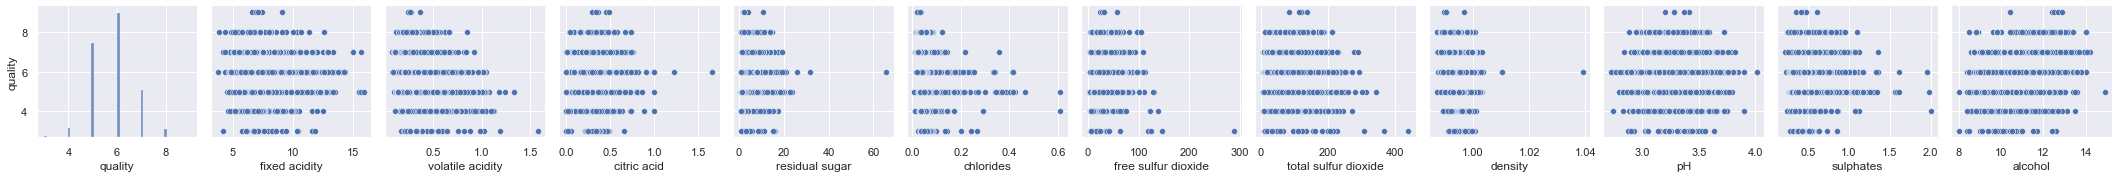

In [255]:
sns.pairplot(data=df_wine, y_vars =['quality'], x_vars=['quality', 'fixed acidity', 'volatile acidity',
                                                               'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide',
                                                               'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [256]:
# Análise de Regressão com Outliers

y = df_wine['quality'] # Variável resposta
X = df_wine.drop(['quality', 'type'], axis=1) # Variáveis explicativas

In [257]:
lr = LinearRegression()

In [258]:
lr.fit(X, y)

LinearRegression()

In [259]:
lr.intercept_ # intercepto (Beta 0)

55.7627496117375

In [260]:
lr.coef_

array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
       -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
        4.39296072e-01,  7.68251760e-01,  2.67030009e-01])

In [261]:
X.loc[0]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
Name: 0, dtype: float64

In [262]:
lr.intercept_ + lr.coef_[0] * X.loc[0]['fixed acidity'] 
+ lr.coef_[1] * X.loc[0]['volatile acidity'] 
+ lr.coef_[2] * X.loc[0]['citric acid']
+ lr.coef_[3] * X.loc[0]['residual sugar'] 
+ lr.coef_[4] * X.loc[0]['chlorides']
+ lr.coef_[5] * X.loc[0]['free sulfur dioxide']
+ lr.coef_[6] * X.loc[0]['total sulfur dioxide']
+ lr.coef_[7] * X.loc[0]['density']
+ lr.coef_[8] * X.loc[0]['pH']
+ lr.coef_[9] * X.loc[0]['sulphates']
+ lr.coef_[10] * X.loc[0]['alcohol']


2.5100820830844266

In [263]:
y_pred = lr.predict(X)
y_pred

array([4.9976074 , 4.92499276, 5.03466303, ..., 5.41936126, 6.43265584,
       6.2057268 ])

In [264]:
lr.score(X, y)

0.2921368850402045

In [265]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:54:15   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.7627     11.894      4.688      0.000      32.447      79.079
fixed acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free sulfur dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total sulfur dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
X1 = df_wine.drop(['quality', 'type', 'citric acid'], axis=1)

In [267]:
x1 = sm.add_constant(X1)

model = sm.OLS(y, x1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:54:20   Log-Likelihood:                -7216.4
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6486   BIC:                         1.453e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.9419     11.894      4.703      0.000      32.626      79.258
fixed acidity            0.0627      0.015      4.139      0.000       0.033       0.092
volatile acidity        -1.2870      0.071    -18.014      0.000      -1.427      -1.147
residual sugar           0.0434      0.005      8.420      0.000       0.033       0.054
chlorides               -0.5550      0.329     -1.689      0.091      -1.199       0.089
free sulfur dioxide      0.0060      0.001      7.988      0.000       0.005       0.007
total sulfur dioxide    -0.0025      0.000     -9.336      0.000      -0.003      -0.002
density                -55.1522     12.138     -4.544      0.000     -78.946     -31.359
pH                       0.4481      0.090      4.971      0.000       0.271       0.625
sulphates                0.7637      0.076     10.041      0.000       0.615       0.913
alcohol                  0.2649      0.017     15.903      0.000       0.232       0.298
==============================================================================
Omnibus:                      144.198   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.165
Skew:                          -0.004   Prob(JB):                     2.46e-71
Kurtosis:                       4.096   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [270]:
# Análise de Regressão sem Outliers

df_wine_sout_reindex = df_wine_sout.reset_index(drop=True)

In [271]:
df_wine_sout_reindex.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red


In [272]:
y_sout = df_wine_sout_reindex['quality'] # Variável resposta
X_sout = df_wine_sout_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

In [273]:
lr.fit(X_sout, y_sout)

LinearRegression()

In [274]:
lr.intercept_ # intercepto (Beta 0)

66.67504970570441

In [297]:
lr.coef_

array([ 9.00718472e-02, -1.23151328e+00, -1.40905358e-01,  5.54208200e-02,
       -1.66881319e-01,  1.04248794e-02, -3.01477376e-03, -6.73354967e+01,
        7.89427587e-01,  7.84791063e-01,  2.62089507e-01])

In [298]:
X_sout.loc[0]

fixed acidity            7.8000
volatile acidity         0.8800
citric acid              0.0000
residual sugar           2.6000
chlorides                0.0980
free sulfur dioxide     25.0000
total sulfur dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
Name: 0, dtype: float64

In [299]:
lr.intercept_ + lr.coef_[0] * X_sout.loc[0]['fixed acidity'] 
+ lr.coef_[1] * X_sout.loc[0]['volatile acidity'] 
+ lr.coef_[2] * X_sout.loc[0]['citric acid']
+ lr.coef_[3] * X_sout.loc[0]['residual sugar'] 
+ lr.coef_[4] * X_sout.loc[0]['chlorides']
+ lr.coef_[5] * X_sout.loc[0]['free sulfur dioxide']
+ lr.coef_[6] * X_sout.loc[0]['total sulfur dioxide']
+ lr.coef_[7] * X_sout.loc[0]['density']
+ lr.coef_[8] * X_sout.loc[0]['pH']
+ lr.coef_[9] * X_sout.loc[0]['sulphates']
+ lr.coef_[10] * X_sout.loc[0]['alcohol']

2.568477169367324

In [324]:
lr.score(X_sout, y_sout)

0.31728046060140513

In [300]:
y_pred_sout = lr.predict(X_sout)
y_pred_sout

array([4.98853062, 5.06034912, 5.66666513, ..., 5.32781072, 6.42092062,
       6.173127  ])

In [301]:
lr.score(X_sout, y_sout)


x_sout = sm.add_constant(X_sout)

model_sout = sm.OLS(y_sout, x_sout).fit()

model_sout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:00:01   Log-Likelihood:                -5969.9
No. Observations:                5457   AIC:                         1.196e+04
Df Residuals:                    5445   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.6750     13.755      4.847      0.000      39.710      93.640
fixed acidity            0.0901      0.017      5.180      0.000       0.056       0.124
volatile acidity        -1.2315      0.086    -14.257      0.000      -1.401      -1.062
citric acid             -0.1409      0.088     -1.600      0.110      -0.314       0.032
residual sugar           0.0554      0.006      9.164      0.000       0.044       0.067
chlorides               -0.1669      0.348     -0.480      0.632      -0.849       0.515
free sulfur dioxide      0.0104      0.001     11.005      0.000       0.009       0.012
total sulfur dioxide    -0.0030      0.000     -9.650      0.000      -0.004      -0.002
density                -67.3355     14.031     -4.799      0.000     -94.841     -39.830
pH                       0.7894      0.108      7.319      0.000       0.578       1.001
sulphates                0.7848      0.082      9.623      0.000       0.625       0.945
alcohol                  0.2621      0.019     13.538      0.000       0.224       0.300
==============================================================================
Omnibus:                      105.908   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.268
Skew:                           0.080   Prob(JB):                     8.06e-47
Kurtosis:                       3.953   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
X_sout1 = df_wine_sout_reindex.drop(['quality', 'type', 'citric acid', 'chlorides'], axis=1)

In [284]:
x_sout1 = sm.add_constant(X_sout1)

model = sm.OLS(y_sout, x_sout1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:55:19   Log-Likelihood:                -5971.5
No. Observations:                5457   AIC:                         1.196e+04
Df Residuals:                    5447   BIC:                         1.203e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.4988     13.448      5.168      0.000      43.135      95.863
fixed acidity            0.0861      0.017      5.136      0.000       0.053       0.119
volatile acidity        -1.1844      0.078    -15.140      0.000      -1.338      -1.031
residual sugar           0.0564      0.006      9.569      0.000       0.045       0.068
free sulfur dioxide      0.0104      0.001     10.995      0.000       0.009       0.012
total sulfur dioxide    -0.0031      0.000     -9.983      0.000      -0.004      -0.002
density                -70.2669     13.705     -5.127      0.000     -97.135     -43.399
pH                       0.8203      0.105      7.803      0.000       0.614       1.026
sulphates                0.7669      0.080      9.632      0.000       0.611       0.923
alcohol                  0.2585      0.019     13.425      0.000       0.221       0.296
==============================================================================
Omnibus:                      107.530   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.998
Skew:                           0.080   Prob(JB):                     7.58e-48
Kurtosis:                       3.964   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusão da Etapa 2
A conclusão é que o modelo não possui um nível de explicação muito acurada.

Verificamos que o modelo teve uma certa melhora do nível de explicação ao removermos os outliers.

Ao analisarmos o p-valor das variáveis, tentaremos remover as variável sem significância para vermos se conseguemos melhorar o nível de explicação do modelo.

In [295]:
X1_sout = df_wine_sout_reindex.drop(['quality', 'type'], axis=1)

In [296]:
x1_sout = sm.add_constant(X1_sout)

model_sout = sm.OLS(y_sout, x1_sout).fit()

model_sout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:59:05   Log-Likelihood:                -5969.9
No. Observations:                5457   AIC:                         1.196e+04
Df Residuals:                    5445   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.6750     13.755      4.847      0.000      39.710      93.640
fixed acidity            0.0901      0.017      5.180      0.000       0.056       0.124
volatile acidity        -1.2315      0.086    -14.257      0.000      -1.401      -1.062
citric acid             -0.1409      0.088     -1.600      0.110      -0.314       0.032
residual sugar           0.0554      0.006      9.164      0.000       0.044       0.067
chlorides               -0.1669      0.348     -0.480      0.632      -0.849       0.515
free sulfur dioxide      0.0104      0.001     11.005      0.000       0.009       0.012
total sulfur dioxide    -0.0030      0.000     -9.650      0.000      -0.004      -0.002
density                -67.3355     14.031     -4.799      0.000     -94.841     -39.830
pH                       0.7894      0.108      7.319      0.000       0.578       1.001
sulphates                0.7848      0.082      9.623      0.000       0.625       0.945
alcohol                  0.2621      0.019     13.538      0.000       0.224       0.300
==============================================================================
Omnibus:                      105.908   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.268
Skew:                           0.080   Prob(JB):                     8.06e-47
Kurtosis:                       3.953   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visto que em nada mudou a desconsideração das variáveis com p-valor, faremos o mesmo com todas os aspectos do vinho.

In [302]:
y_sout = df_wine_sout_reindex['quality'] # Variável resposta
X_sout = df_wine_sout_reindex.drop(['quality', 'type'], axis=1) # Variáveis explicativas

In [303]:
lr.score(X_sout, y_sout)


x_sout = sm.add_constant(X_sout)

model_sout = sm.OLS(y_sout, x_sout).fit()

model_sout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:00:44   Log-Likelihood:                -5969.9
No. Observations:                5457   AIC:                         1.196e+04
Df Residuals:                    5445   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.6750     13.755      4.847      0.000      39.710      93.640
fixed acidity            0.0901      0.017      5.180      0.000       0.056       0.124
volatile acidity        -1.2315      0.086    -14.257      0.000      -1.401      -1.062
citric acid             -0.1409      0.088     -1.600      0.110      -0.314       0.032
residual sugar           0.0554      0.006      9.164      0.000       0.044       0.067
chlorides               -0.1669      0.348     -0.480      0.632      -0.849       0.515
free sulfur dioxide      0.0104      0.001     11.005      0.000       0.009       0.012
total sulfur dioxide    -0.0030      0.000     -9.650      0.000      -0.004      -0.002
density                -67.3355     14.031     -4.799      0.000     -94.841     -39.830
pH                       0.7894      0.108      7.319      0.000       0.578       1.001
sulphates                0.7848      0.082      9.623      0.000       0.625       0.945
alcohol                  0.2621      0.019     13.538      0.000       0.224       0.300
==============================================================================
Omnibus:                      105.908   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.268
Skew:                           0.080   Prob(JB):                     8.06e-47
Kurtosis:                       3.953   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Continuação da conclusão da Etapa 2

Verificamos que em nada mudou a remoção das características, teoricamente insignificantes.

Entre os modelos, continuaremos com aquele que não conta com a remoção dos outliers, visto que este apresenta um maior nível explicativo da variável resposta.

Ainda, para a próxima etapa, manteremos todas as características visto que a remoção destes não impactaram o modelo.

## Etapa 3

In [304]:
model_logic = LogisticRegression(max_iter=1000)

In [313]:
X0 = np.array(y_pred_sout.round()).reshape(-1,1)
X0

array([[5.],
       [5.],
       [6.],
       ...,
       [5.],
       [6.],
       [6.]])

In [314]:
Y = np.array(df_wine_sout_reindex['quality'])
Y

array([5, 5, 6, ..., 6, 7, 6])

In [315]:
model_logic.fit(X0, Y)

LogisticRegression(max_iter=1000)

In [316]:
y_pred2 = model_logic.predict(X0)
y_pred2

array([5, 5, 6, ..., 5, 6, 6])

In [317]:
df_wine_q = df_wine_sout_reindex.drop(['quality'], axis=1)
df_wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,red
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,red


In [318]:
#Verficando a qualidade do modelo
confusion_matrix = metrics.confusion_matrix(Y,y_pred2)
confusion_matrix

array([[   0,    0,   12,    7,    0,    0,    0],
       [   0,    0,   94,   85,    1,    0,    0],
       [   0,    0,  917,  819,   11,    0,    0],
       [   0,    0,  403, 1788,  201,    0,    0],
       [   0,    0,   30,  660,  253,    0,    0],
       [   0,    0,    1,  112,   58,    0,    0],
       [   0,    0,    0,    1,    4,    0,    0]])

In [319]:
#Acurácia, precisão e recall (aqui, para todo os dados -->a maneira mais adequada é comparar com os dados de teste)
print("Accuracy:",metrics.accuracy_score(Y, y_pred2))
print("Precision:",metrics.precision_score(Y, y_pred2, average='micro'))
print("Recall:",metrics.recall_score(Y, y_pred2, average='micro'))

Accuracy: 0.5420560747663551
Precision: 0.5420560747663551
Recall: 0.5420560747663551


### Conclusão das Métricas de Acurácia, Precisão e Recall do Modelo

Apesar de um nível de explicação do modelo baixo, podemos ver que as métricas de Acurácia, Precisão e Recall do Modelo são maiores do que 50%, o que de alguma forma favorece, de certa maneira, o modelo quanto a sua qualidade.

In [320]:
# Função Classificação de Qualidade

def qualidade(array):
    a = []
    for nota in array:
        if nota >= 6:
            a.append('Bom')
        else:
            a.append('Ruim')
    return a

os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;

In [321]:
# Aplicando a função Classificação de Qualidade nas predições

qualidade(y_pred2)

['Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Bom',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Bom',
 'Bom',
 'Bom',
 'Ruim',
 'Bom',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Bom',
 'Bom',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',
 'Ruim',
 'Ruim',
 'Bom',
 'Ruim',


In [322]:
# Atribuindo as Classificações ao Dataframe original

df_wine_q['quality'] = qualidade(y_pred2)

In [323]:
df_wine_q.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,Ruim
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,Ruim
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,Bom
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,red,Ruim
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,red,Ruim
